# **CIBA - PYTHON INTERMEDIO**

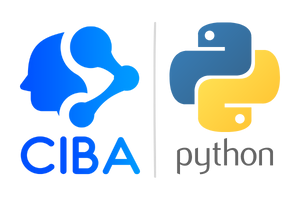

# SESIÓN 2 - TEMA 2

#Modelos de Aprendizaje: Regresión Lineal y Logística

Contenido:
* Regresión Lineal Simple
* Regresión Lineal Múltiple
* Regresión Logística

## Regresión Lineal Simple

### Definición

Ajusta la relación entre dos variables a una línea recta en $ℝ^2$.

$$y = \beta _0 + \beta_1 x + \epsilon_i$$

Donde:
* $x$: Variable independiente.
* $y$: Variable dependiente.
* $\beta_1$: Pendiente. Indica la relación entre la variable independiente y dependiente.
* $\beta_0$: Intercepto, es el valor de $y$ cuando x = 0. 
* $\epsilon_i$: Error o residuos. Es la diferencia entre el valor real y el valor predicho ($y - \hat{y}$).

Nota:  $\hat{y} = \beta _0 + \beta_1 x$

### Métodos de Estimación de los parámetros
*  **Mínimos Cuadrados Ordinarios (MCO):** 

  Minimiza la suma de cuadrados de los errores/residuos. 

$$ Min \sum^{N}_{i=1}{e_i^2} = Min \sum^{N}_{i=1}{(y_i- \beta _0 + \beta_1 x_i)^2} $$

* **Máxima Verosimilitud (MV):**
  
  Utiliza la distribución de los datos para calcular los parámetros. Maximiza la función de log-verosimilitud.

* **Método de Momentos**
* **Máxima Verosimilitud Restringida (MVR)**

### Supuestos:

* Linealidad: La relación entre las variables debe de ser lineal.

* Independencia: Las observaciones son independientes entre sí.

* Homocedasticidad: La varianza de los errores/residuales debe ser constante para todas las observaciones.

* Normalidad: Los errores/residuales de predicción deben seguir una distribución normal.

* No autocorrelación: Los errores/residuales de predicción deben ser independientes entre sí y no deben estar correlacionados.

### Cuarteto de Anscombe
La importancia de la visualización de los datos.

In [1]:
#Librerías a utilizar
import numpy as np
import pandas as pd

# Genera los datos para el cuarteto de Anscombe
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

# Crea un DataFrame con los datos
data = pd.DataFrame({"x": x, "y1": y1, "y2": y2, "y3": y3, "y4": y4})

In [2]:
#Media y Desviación estándar
data.aggregate([np.mean,np.std])

,x,y1,y2,y3,y4
mean,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,2.031568,2.031657,2.030424,2.030579


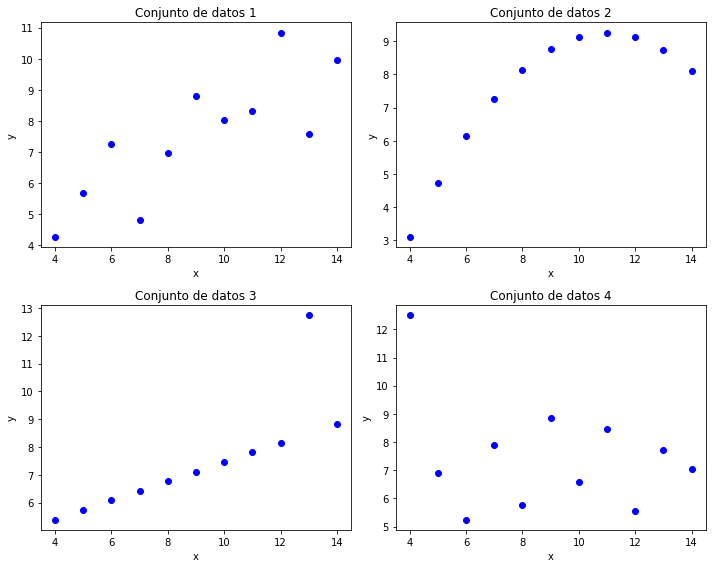

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2,figsize=(10,8))
#genera un trazo accediendo a las graficas a traves del indice de la matriz
for i in range(4):
  axes[i // 2 ,i % 2].scatter(data['x'], data["y" + str(i + 1)], color = 'b')
  axes[i // 2 ,i % 2].set_title("Conjunto de datos " + str(i + 1))
  axes[i // 2, i % 2].set_xlabel("x")
  axes[i // 2, i % 2].set_ylabel("y")
fig.tight_layout() #mejora la visualizacion de los ejes de cada grafico

### Data: Casas

In [4]:
#Conexión a Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
%cd '/content/gdrive/My Drive/Materiales Intermedio'

/content/gdrive/.shortcut-targets-by-id/1iRPXuwLa-IsUGV2sedp1OZuHhi6bz1Aq/Materiales Intermedio


In [6]:
cols_casas = ["area", "baños", "dormitorios", "antiguedad", "precio"]

In [7]:
df_casas = pd.read_csv('casas.txt', sep = '\t', names= cols_casas, header = None)

In [8]:
#Como es una regresión simple vamos a utilizar solo las columnas área y precio
df_casas[['area','precio']].head()

,area,precio
0,132.3,319000.0
1,141.5,389000.0
2,71.2,199000.0
3,277.4,599000.0
4,338.7,750000.0


In [9]:
df_casas[['area','precio']].describe()

,area,precio
count,58.000000,58.000000
mean,205.465517,429402.068966
std,111.225913,241103.667634
min,59.400000,90000.000000
25%,120.650000,241750.000000
50%,178.450000,379000.000000
75%,262.100000,589250.000000
max,520.000000,949000.000000


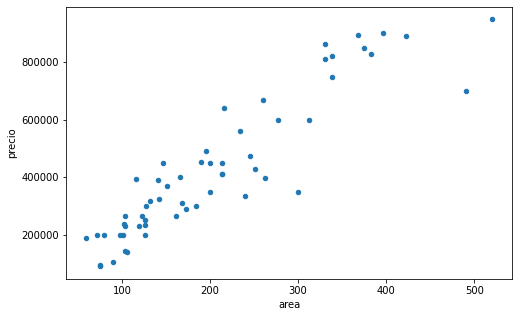

In [10]:
df_casas.plot.scatter("area", "precio", figsize=(8,5))

### Creación del Modelo

La función para crear un modelo de Regresión Lineal es `LinearRegression()`.

Uno de sus argumentos es `fit_intercept` que establece el cálculo del intercepto para el modelo.

In [11]:
from sklearn.linear_model import LinearRegression
modelo_rs = LinearRegression()
modelo_rs.fit(X = df_casas[["area"]], y=df_casas["precio"])

LinearRegression()

In [12]:
b1 = modelo_rs.coef_
b0 = modelo_rs.intercept_

#Coeficientes
b1,b0

(array([1981.9143839]), 22187.004950031114)

### Predicción

In [13]:
prediccion = modelo_rs.predict(df_casas[["area"]])
prediccion

array([ 284394.27793958,  302627.89027143,  163299.30908348,
        571970.055043  ,  693461.40677588,  677209.70882792,
        860338.59789999,  750738.7324705 ,  520242.0896233 ,
        273890.13170492,  312141.07931413,  640544.29272583,
        224738.65498428,  352175.74986885,  780665.63966734,
        693461.40677588,  398750.73789042,  764215.75028099,
        179154.62415466,  677209.70882792,  807421.48384994,
        271908.21732103,  304807.99609372,  445325.725912  ,
        445325.725912  ,  450280.51187174,  252089.07348206,
        486747.73653544,  507756.02900475,  199370.15087041,
        139912.7193535 ,  226324.1864914 ,  272106.40875942,
        231278.97245114,  386066.48583348,  365652.76767935,
        537484.7447632 ,  322248.84267201,  356139.57863664,
        259620.34814087,  228504.29231369,  272106.40875942,
        543034.10503811,  215027.27450319,  445325.725912  ,
        410047.64987864,  497846.45708526,  172019.73237263,
        221765.78340844,

In [14]:
df_casas["prediccion_RS"] = prediccion

### Revisando los supuestos

In [15]:
#Residuales
df_casas['residuales_RS'] = df_casas['precio']-df_casas['prediccion_RS']

#Estandarización de los residuales
df_casas['residuales_RS'] = df_casas['residuales_RS'].apply(lambda x: 
                                                            (x-np.mean(df_casas['residuales_RS']))/
                                                            np.std(df_casas['residuales_RS'])
                                                            )

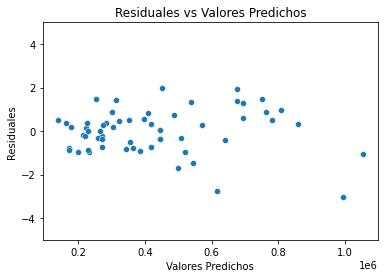

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Homocedasticidad
p = sns.scatterplot(x = df_casas['prediccion_RS'],y = df_casas['residuales_RS'])
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.ylim(-5,5)
p = plt.title('Residuales vs Valores Predichos')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


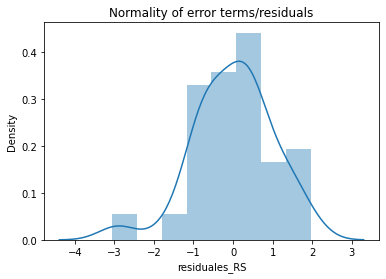

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#Normalidad
p = sns.distplot(df_casas['residuales_RS'],kde=True)
p = plt.title('Normality of error terms/residuals')

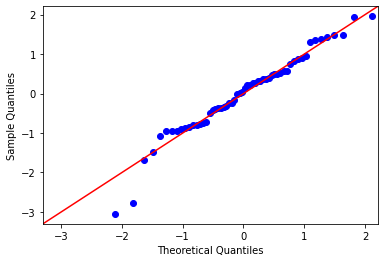

In [21]:
import matplotlib.pyplot as plt
import statsmodels.api as smi

#create la gráfica QQ con una línea de 45 grados agregada a la gráfica
fig = smi.qqplot(df_casas['residuales_RS'], line = '45')
plt.show()

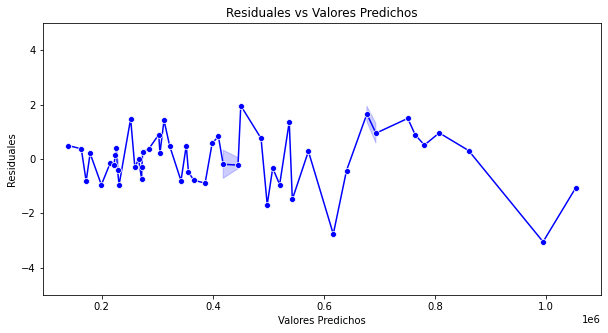

In [22]:
#Autocorrelación
plt.figure(figsize=(10,5))
p = sns.lineplot(x = df_casas['prediccion_RS'],y = df_casas['residuales_RS'],marker='o',color='blue')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.ylim(-5,5)
p = plt.title('Residuales vs Valores Predichos')

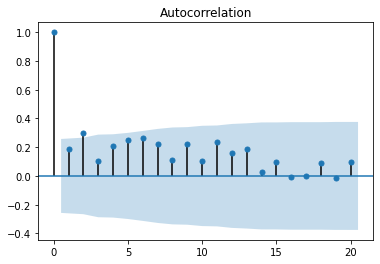

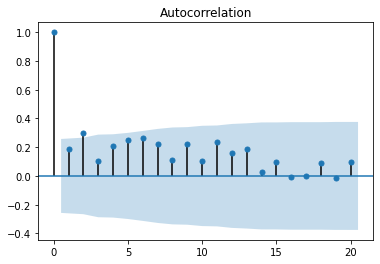

In [24]:
# Autocorrelación con ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_casas['residuales_RS'], lags=20)

### Medidas de Bondad de ajuste 

#### Coeficiente de Determinación ($R^2$)
Es una medida que nos permite conocer que tan bien se ajusta el modelo de regresión lineal a los datos. 

$$R^2 = \frac{SC_{Regresión}}{SC_{Total}}$$

Donde:
$$SC_{Total} = SC_{Regresión} + SC_{Error}$$



In [25]:
#Coeficiente de determinación
r_squared = modelo_rs.score(X = df_casas[["area"]], y=df_casas["precio"])
print("Coeficiente de determinación (R²):", r_squared)

Coeficiente de determinación (R²): 0.8359380686826385


In [26]:
#Otra forma
from sklearn.metrics import r2_score

r_squared = r2_score(df_casas["precio"], df_casas["prediccion_RS"])
print("Coeficiente de determinación (R²):", r_squared)

Coeficiente de determinación (R²): 0.8359380686826385


In [27]:
#Coeficiente de determinación ajustado
n = df_casas.shape[0]
p = 1+1
r2_aj_rs = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("R2 ajustado: ",r2_aj_rs)

R2 ajustado:  0.8299721802710981


#### Error Cuadrático Medio (ECM o RMSE):
Es la raíz cuadrada del Error Cuadrático (EC o MSE) que es la distancia cuadrada promedio entre el valor real y el valor pronosticado.

El RMSE es una medida absoluta de ajuste que se puede interpretar como la desviación estándar de la varianza inexplicada, y tiene la propiedad útil de estar en las mismas unidades que la variable de respuesta.

In [28]:
#Error Cuadrático Medio
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df_casas["precio"], df_casas["prediccion_RS"]) ** (0.5)
print(f"ECM: {rmse}")

ECM: 96812.43817508711


In [29]:
df_casas['prediccion_RS'].mean()

429402.06896551716

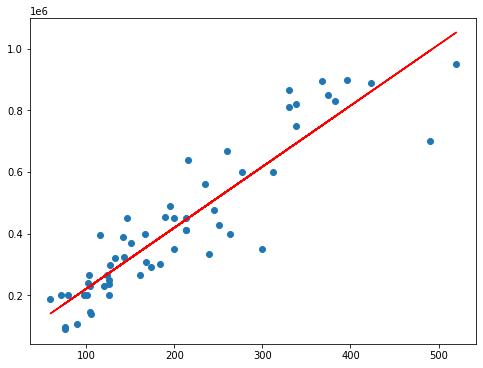

In [30]:
#Gráfica de la regresión
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(df_casas['area'],df_casas['precio'])
ax.plot(df_casas['area'],df_casas['prediccion_RS'], 'r')

### Extra: Otra forma de generar una Regresión Lineal Simple


In [31]:
import numpy as np
import statsmodels.api as sm

# Agrega una constante a la variable independiente
x = sm.add_constant(df_casas['area'].to_list())

# Crea el modelo de regresión lineal
model = sm.OLS(df_casas['precio'], x)

# Ajusta el modelo
results = model.fit()

# Imprime los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     285.3
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.21e-23
Time:                        21:23:28   Log-Likelihood:                -748.17
No. Observations:                  58   AIC:                             1500.
Df Residuals:                      56   BIC:                             1504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.219e+04   2.74e+04      0.811      0.4

## Regresión Lineal Múltiple

### Supuestos:

* Linealidad: La relación entre las variables debe de ser lineal.

* Independencia: Las observaciones son independientes entre sí.

* Homocedasticidad: La varianza de los errores/residuales debe ser constante para todas las observaciones.

* Normalidad: Los errores/residuales de predicción deben seguir una distribución normal.

* No multicolinealidad: Las variables independientes no están altamente correlacionadas entre sí.

* No autocorrelación: Los errores/residuales de predicción deben ser independientes entre sí y no deben estar correlacionados.

In [32]:
df_casas.describe()

,area,baños,dormitorios,antiguedad,precio,prediccion_RS,residuales_RS
count,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,5.800000e+01
mean,205.465517,3.275862,2.672414,78.419310,429402.068966,4.294021e+05,-2.679849e-17
std,111.225913,1.308449,1.467638,23.732052,241103.667634,2.204402e+05,1.008734e+00
min,59.400000,1.000000,1.000000,42.000000,90000.000000,1.399127e+05,-3.050393e+00
25%,120.650000,3.000000,2.000000,60.325000,241750.000000,2.613050e+05,-7.444667e-01
50%,178.450000,3.000000,3.000000,75.650000,379000.000000,3.758596e+05,9.727892e-02
75%,262.100000,4.000000,3.000000,93.150000,589250.000000,5.416468e+05,5.590246e-01
max,520.000000,10.000000,11.000000,138.700000,949000.000000,1.052782e+06,1.959660e+00


### Creación del Modelo

In [33]:
modelo = LinearRegression()

In [34]:
#X
df_casas[['area','baños','dormitorios','antiguedad']].head()

,area,baños,dormitorios,antiguedad
0,132.3,3,2,66.15
1,141.5,3,2,70.75
2,71.2,1,1,71.20
3,277.4,3,2,138.70
4,338.7,4,4,84.68


In [35]:
modelo.fit(df_casas[['area','baños','dormitorios','antiguedad']], df_casas['precio'])

LinearRegression()

In [36]:
#Coeficientes
b1 = modelo.coef_
b0 = modelo.intercept_

b1, b0

(array([  2449.26277779, -66328.49083389,   7336.76959008,    488.31493203]),
 85545.80823211413)

### Predicción

In [37]:
df_casas["prediccion_RM"] = modelo.predict(df_casas[['area','baños','dormitorios','antiguedad']])
df_casas.head()

,area,baños,dormitorios,antiguedad,precio,prediccion_RS,residuales_RS,prediccion_RM
0,132.3,3,2,66.15,319000.0,284394.277940,0.357451,257573.373165
1,141.5,3,2,70.75,389000.0,302627.890271,0.892159,282352.839408
2,71.2,1,1,71.20,199000.0,163299.309083,0.368761,235709.619927
3,277.4,3,2,138.70,599000.0,571970.055043,0.279199,648388.650541
4,338.7,4,4,84.68,750000.0,693461.406776,0.584001,720494.734537


### Revisando los supuestos

In [38]:
#Residuales
df_casas['residuales_RM'] = df_casas['precio']-df_casas['prediccion_RM']

#Estandarización de los residuales
df_casas['residuales_RM'] = df_casas['residuales_RM'].apply(lambda x: 
                                                            (x-np.mean(df_casas['residuales_RM']))/
                                                            np.std(df_casas['residuales_RM'])
                                                            )

In [39]:
import seaborn as sns

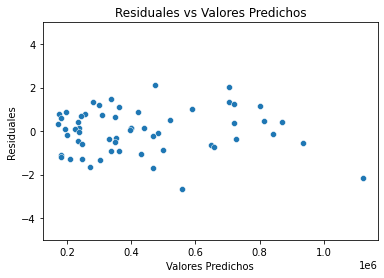

In [40]:
#Homocedasticidad
p = sns.scatterplot(x = df_casas['prediccion_RM'],y = df_casas['residuales_RM'])
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.ylim(-5,5)
p = plt.title('Residuales vs Valores Predichos')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


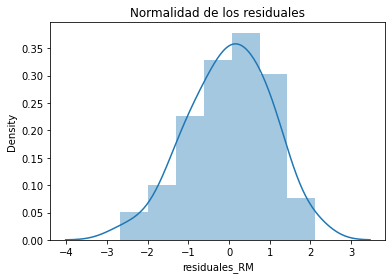

In [41]:
#Normalidad
p = sns.distplot(df_casas['residuales_RM'],kde=True)
p = plt.title('Normalidad de los residuales')

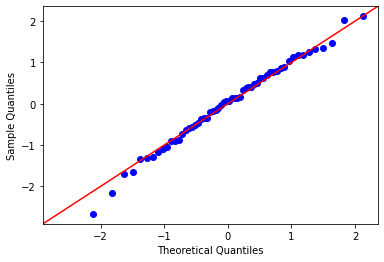

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as smi

fig = smi.qqplot(df_casas['residuales_RM'], line = '45')
plt.show()

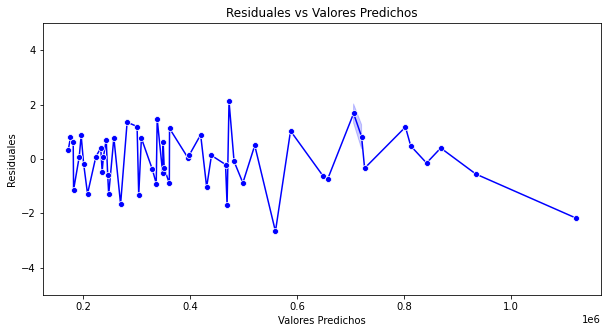

In [43]:
#Autocorrelación
plt.figure(figsize=(10,5))
p = sns.lineplot(x = df_casas['prediccion_RM'],y = df_casas['residuales_RM'],marker='o',color='blue')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.ylim(-5,5)
p = plt.title('Residuales vs Valores Predichos')

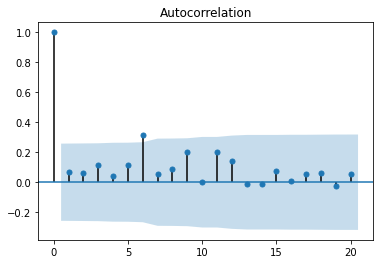

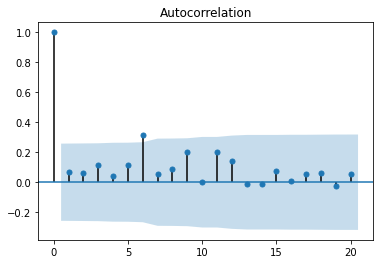

In [44]:
# Autocorrelación con ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_casas['residuales_RM'], lags=20)

### Medidas de Bondad de Ajuste

#### Coeficiente de Determinación ($R^2$)

In [45]:
#Coeficiente de determinación
r2 = modelo.score(X = df_casas[['area','baños','dormitorios','antiguedad']], y=df_casas["precio"])
print("Coeficiente de determinación (R²):", r2)

Coeficiente de determinación (R²): 0.8909321788605766


In [46]:
#Otra forma
from sklearn.metrics import r2_score

r2 = r2_score(df_casas["precio"], df_casas["prediccion_RM"])
print("Coeficiente de determinación (R²):", r2)

Coeficiente de determinación (R²): 0.8909321788605766


In [47]:
#Coeficiente de determinación ajustado
n = df_casas.shape[0]
p = 4+1
r2_aj_rm = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("R2 ajustado: ",r2_aj_rm)

R2 ajustado:  0.8201628829790462


#### Error Cuadrático Medio (ECM o RMSE)

In [48]:
#Error Cuadrático Medio
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df_casas["precio"], df_casas["prediccion_RM"]) ** (0.5)
print(f"ECM: {rmse}")

ECM: 78936.0820356424


In [49]:
df_casas['prediccion_RM'].mean()

429402.0689655171

#### AIC 
El criterio de información de Akaike es una medida que nos permite comparar modelos estadísticos comparando la bondad de ajuste del modelo y la complejidad del mismo (medido en cantidad de parámetros).

In [50]:
#AIC
def AIC(n, ecm, p):
    '''Calcula el AIC de una regresión lineal múltiple de 'p' parámetros, 
       ajustada sobre una muestra de 'n' elementos, y que da lugar a un 
       error cuadrático medio 'ecm'.'''
    aic = n * np.log(ecm) + 2 * p
    return aic

In [51]:
ecm_rs =  mean_squared_error(df_casas["precio"], df_casas["prediccion_RS"]) ** (0.5)
ecm_rm =  mean_squared_error(df_casas["precio"], df_casas["prediccion_RM"]) ** (0.5)

aic_rs = AIC(n,ecm_rs,2)
aic_rm = AIC(n,ecm_rs,5)

print(f"Regresión Lineal Simple:\n AIC:{aic_rs:.2f}\n ECM:{ecm_rs:.2f}\nRegresión Lineal Múltiple:\n AIC:{aic_rm:.2f}\n ECM:{ecm_rm:.2f}\n")

Regresión Lineal Simple:
 AIC:669.87
 ECM:96812.44
Regresión Lineal Múltiple:
 AIC:675.87
 ECM:78936.08



Cuando complejizamos el modelo mejorando el error cuadrático medio, pero sin disminuir el AIC, es probable que el modelo se esté sobreajustando a los datos de entrenamiento.

### Extra: Selección de Variables

#### Selección de características univariante

Selecciona las mejores características en función a pruebas estadísticas univariadas (ej.: Prueba F)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

# Separa las variables predictoras de la variable objetivo
X = df_casas[["area","baños","dormitorios","antiguedad"]]
y = df_casas["precio"]

# Crea una instancia de la clase LinearRegression
reg = LinearRegression()

# Crea una instancia de la clase SelectKBest
selector = SelectKBest(f_regression, k=2)

# Selecciona las k mejores variables utilizando el método f_regression
data_new = selector.fit_transform(X, y)

# Entrena el modelo de regresión lineal utilizando las variables seleccionadas
reg.fit(data_new, y)

# Imprime los coeficientes del modelo
print(reg.coef_)

[  2382.24788015 -40740.16998908]


#### Selección secuencial de variables

Permite seleccionar variables tanto hacia adelante (forward) o hacia atrás (backward) según una medida de ajuste (ej: $R^2$).


In [53]:
from sklearn.feature_selection import SequentialFeatureSelector

# Separa las variables predictoras de la variable objetivo
X = df_casas[["area","baños","dormitorios","antiguedad"]]
y = df_casas["precio"]

# Crea una instancia de la clase LinearRegression
reg = LinearRegression()

sfs = SequentialFeatureSelector(reg, 
                                n_features_to_select=2,
                                direction='forward'
                                )
sfs.fit(X, y)

#Selección de columnas
print(sfs.get_support())

reg.fit(X = sfs.transform(X),y=y)

print(reg.coef_)

[ True  True False False]
[  2569.63431763 -65922.08350766]


## Regresión Logística

### Definición
Es un modelo que se utiliza para predecir una variable categórica a partir de una o más variables independientes (predictoras). La función de respuesta que se utiliza es una función logística (logit), que transforma la salida lineal del modelo a una probabilidad de pertenecer a una de las categorías.

* Regresión Logística Simple o Binaria
* Regresión Logística Múltiple
  * Regresión Logística Nominal
  * Regresión Logística Ordinal

### Data: Lluvia en Australia

In [54]:
# Carga de datos
import pandas as pd
df = pd.read_csv("weatherAUS.csv")
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [55]:
#Transformación y Limpieza
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace = True)

df.dropna(inplace=True)

In [56]:
import pandas as pd

# Separación de variables predictoras y target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [57]:
y.value_counts()

No     43993
Yes    12427
Name: RainTomorrow, dtype: int64

In [58]:
# Separación de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [59]:
y_train.value_counts(normalize=True)

No     0.77946
Yes    0.22054
Name: RainTomorrow, dtype: float64

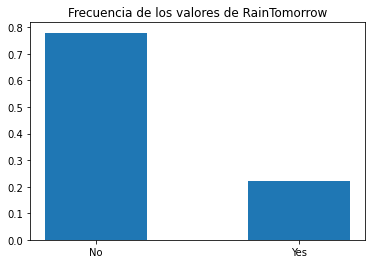

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(y_train.value_counts(normalize=True).index,y_train.value_counts(normalize=True),width=0.5)
plt.title('Frecuencia de los valores de RainTomorrow')

#Show plot
plt.show()

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [ ]:
!pip install category_encoders

In [63]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

#RainToday_0: Yes
#RainToday_1: No

In [64]:
#Transformando las variables categóricas en dummies
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

### Creación del Modelo

Un modelo de regresión logística se crea con la función `LogisticRegression(...)`

En el caso de que se requiera asignar pesos o balancear los datos, se utiliza el parámetro `class_weight`

```
#Por defecto no se aplica balanceo
model = LogisticRegression(class_weight=None)
```

También se puede elegir el algoritmo con el cual se realizará el modelo.
```
solver = [‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’]
```

Además se puede aplicar la penalización de variables con métodos como Ridge y Lasso.

```
#Ejemplo de penalización Ridge
model = LogisticRegression(penalty='l2',...)
```

Finalmente, si queremos replicar los resultados, utilizamos `random_state`.



In [65]:
# Creación del modelo de regresión logística
#SIN BALANCEO

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

model = LogisticRegression(solver="liblinear")
# Entrenamiento del modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicción con los datos de prueba
y_pred = model.predict(X_test)

### Matriz de Confusión

Nos muestra el número de predicciones correctas e incorrectas realizadas por el modelo en cada una de las clases a predecir.

Además, los valores de la matriz se pueden utilizar para calcular otras métricas de evaluación de modelos.

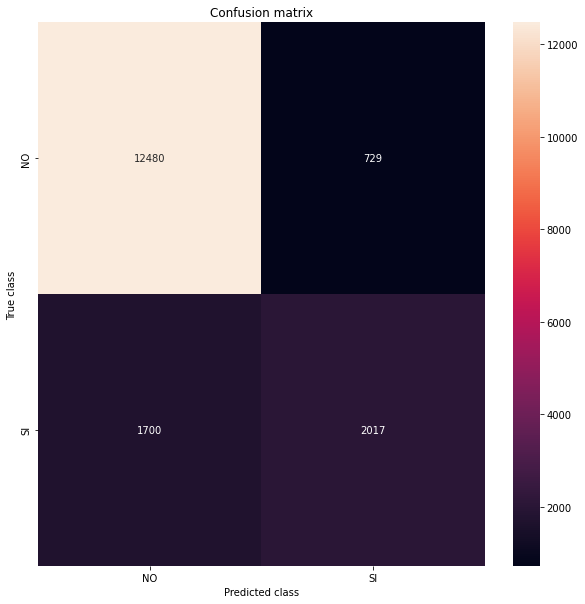

              precision    recall  f1-score   support

          No       0.88      0.94      0.91     13209
         Yes       0.73      0.54      0.62      3717

    accuracy                           0.86     16926
   macro avg       0.81      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



In [66]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=['NO','SI'], yticklabels=['NO','SI'], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred))

### Balanceo de Datos

In [67]:
modelb = LogisticRegression(class_weight="balanced",solver="liblinear")
# Entrenamiento del modelo con los datos de entrenamiento
modelb.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

### Predicción

In [68]:
# Predicción con los datos de prueba
y_predb = modelb.predict(X_test)

In [69]:
#Probabilidad de pertenecer a las clases 'No', 'Yes'
modelb.predict_proba(X_test)

array([[0.86789986, 0.13210014],
       [0.65518376, 0.34481624],
       [0.56667236, 0.43332764],
       ...,
       [0.27232335, 0.72767665],
       [0.48972206, 0.51027794],
       [0.96081142, 0.03918858]])

In [70]:
#Guardamos las probabilidades de que si llueva
y_pred_prob = modelb.predict_proba(X_test)[:,1]

### Matriz de Confusión

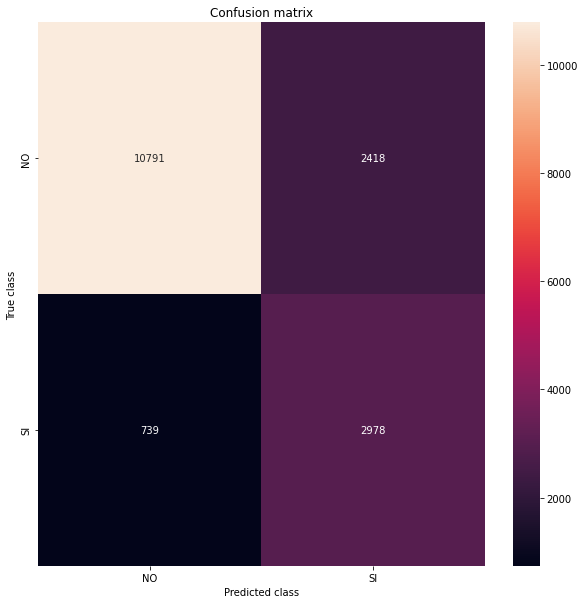

              precision    recall  f1-score   support

          No       0.94      0.82      0.87     13209
         Yes       0.55      0.80      0.65      3717

    accuracy                           0.81     16926
   macro avg       0.74      0.81      0.76     16926
weighted avg       0.85      0.81      0.82     16926



In [71]:
import seaborn as sns
conf_matrix_bal = confusion_matrix(y_test, y_predb)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix_bal, xticklabels=['NO','SI'], yticklabels=['NO','SI'], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_predb))

In [72]:
conf_matrix_bal

array([[10791,  2418],
       [  739,  2978]])

### Medidas de Bondad de Ajuste

#### Accuracy o Exactitud

In [73]:
#ACCURACY
accuracy_score(y_test, y_predb)

0.8134822167080231

In [74]:
#Accuracy para los datos de entrenamiento y prueba
print('Training set score: {:.4f}'.format(modelb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(modelb.score(X_test, y_test)))

Training set score: 0.8084
Test set score: 0.8135


#### Specificity  o Especificidad

In [75]:
specificity = 10791 / (10791 + 2418)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8169


#### ROC

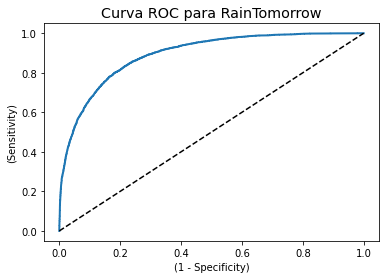

In [76]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('Curva ROC para RainTomorrow')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')

plt.show()

#### AUC (Área bajo la curva)

In [77]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8919
